In [1]:
import torch
import pyro
import pyro.distributions as dist
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from tapqir.distributions import AffineBeta, ConvolutedGamma, MaskedNormalKDE, NormalKDE, MultiModal
from pyro.ops.stats import quantile
from pyro.ops.indexing import Vindex
from tapqir.models import Empirical, SpotDetection

In [2]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,})
    #"font.family": "sans-serif",
    #"font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

/home/ordabayev/anaconda3/envs/dev/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


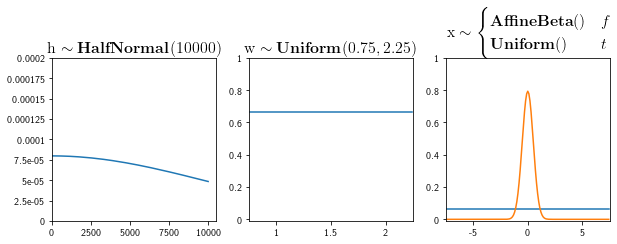

In [27]:
plt.figure(figsize=(10,3))

plt.subplot(131)
x = torch.arange(0, 10000)
d = dist.HalfNormal(10000)
plt.plot(x, d.log_prob(x).exp(), "-", label="MCC")
plt.ylim(0, 2e-4)
plt.xlim(0,)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{h} \sim \mathbf{HalfNormal}(10000) \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.subplot(132)
x = torch.arange(0.75, 2.25, 0.01)
d = AffineBeta(1.5, 2., 0.75, 2.25)
plt.plot(x, d.log_prob(x).exp(), "-", label="MCC")
plt.ylim(-0.01, 1)
plt.xlim(0.75, 2.25)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{w} \sim \mathbf{Uniform}(0.75, 2.25) \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.subplot(133)
x = torch.arange(-7.5, 7.5, 0.1)
d = AffineBeta(0, 2, -7.5, 7.5)
d2 = AffineBeta(0, 223, -7.5, 7.5)
plt.plot(x, d.log_prob(x).exp(), "-", label="MCC")
plt.plot(x, d2.log_prob(x).exp(), "-", label="MCC")
plt.ylim(-0.01, 1)
plt.xlim(-7.5, 7.5)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{x} \sim" \
          r"\begin{cases}" \
          r"\mathbf{AffineBeta}() & f \\" \
          r"\mathbf{Uniform}() & t " \
          r"\end{cases} \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

#plt.tight_layout()
plt.show()

In [3]:
from cosmos.models import SpotDetection

In [4]:
model = SpotDetection(1, 2)

In [5]:
model.load("/shared/centaur/data/experimental/nonattenuated/FL_3339_4444_0p8OD/", False, torch.device("cpu"))

<BarContainer object of 23 artists>

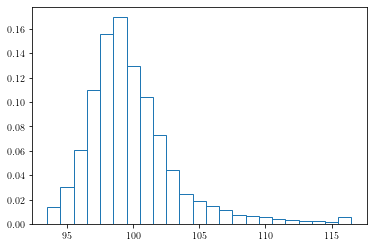

In [6]:
plt.bar(model.offset_samples, model.offset_weights, width=1, fill=False, edgecolor="C0")

In [13]:
x = torch.tensor([200.])
z = (x - model.offset_samples).reshape(1,-1)

In [14]:
torch.fft(dist.Gamma(100/7, 1/7).log_prob(z).exp(), 1)

RuntimeError: Expected an input tensor with a last dimension of size 2 representing real + imaginary components, but got input torch.FloatTensor[1, 23]

In [ ]:
ConvolutedGamma

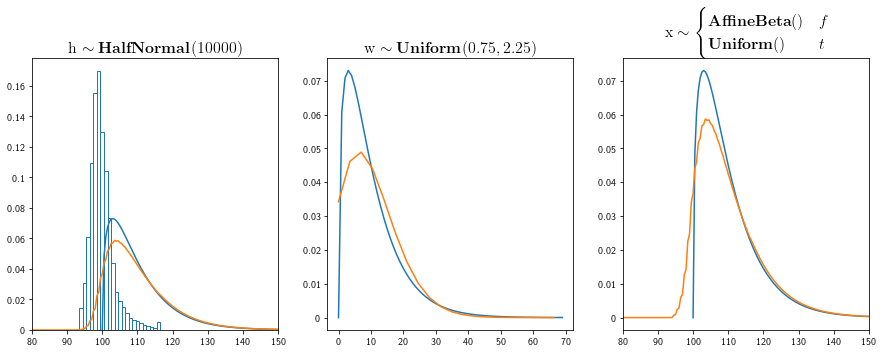

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.bar(model.offset_samples, model.offset_weights, width=1, fill=False, edgecolor="C0")
x = torch.arange(0, 200, 0.5)
d = dist.Gamma(10/7, 1/7)
d2 = ConvolutedGamma(torch.tensor([10.])/7, 1/7, model.offset_samples, model.offset_weights.log())
plt.plot(x+100, d.log_prob(x).exp(), "-", label="MCC")
plt.plot(x, d2.log_prob(x).exp(), "-", label="MCC")
#plt.ylim(0, 2e-4)
plt.xlim(80,150)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{h} \sim \mathbf{HalfNormal}(10000) \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.subplot(132)
x = torch.arange(0, 70, 1)
y = torch.arange(0, 10, 0.5)
d = dist.Gamma(10/7, 1/7)
d3 = dist.Poisson(10/7)
plt.plot(x, d.log_prob(x).exp(), "-", label="MCC")
plt.plot(y*7, d3.log_prob(y).exp()/7, "-", label="MCC")
#plt.ylim(-0.01, 1)
#plt.xlim(0.75, 2.25)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{w} \sim \mathbf{Uniform}(0.75, 2.25) \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.subplot(133)
x = torch.arange(0, 200, 0.5)

d2 = ConvolutedGamma(torch.tensor([10.])/7, 1/7, model.offset_samples, model.offset_weights.log())
plt.plot(x+100, d.log_prob(x).exp(), "-", label="MCC")
plt.plot(x, d2.log_prob(x).exp(), "-", label="MCC")

#plt.ylim(-0.01, 1)
plt.xlim(80, 150)
#plt.xlabel(r"SNR", fontsize=16)
#plt.ylabel("Accuracy", fontsize=16)
plt.title(r"\[ \mathrm{x} \sim" \
          r"\begin{cases}" \
          r"\mathbf{AffineBeta}() & f \\" \
          r"\mathbf{Uniform}() & t " \
          r"\end{cases} \]", fontsize=16)

#plt.gca().axes.get_xaxis().set_ticks(np.arange(1,6)*0.2)
#plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#plt.xticks(size=16)
#plt.yticks(size=16)
#plt.legend(fontsize=16)

#plt.tight_layout()
plt.show()

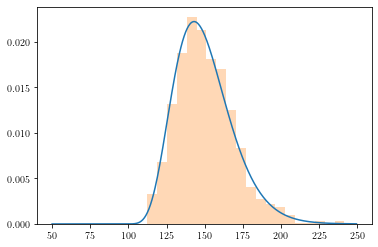

In [93]:
de = dist.Empirical(model.offset_samples, model.offset_weights.log()).sample((1000,)).numpy()
dg = dist.Gamma(50/7, 1/7).sample((1000,)).numpy()
#plt.hist(de+dg, bins=20, density=True, alpha=0.3)
x = torch.arange(50, 250, 0.5)
#d = dist.Gamma(10/7, 1/7)
d2 = ConvolutedGamma(torch.tensor([50.])/7, 1/7, model.offset_samples, model.offset_weights.log())
#plt.plot(x+100, d.log_prob(x).exp(), "-", label="MCC")
plt.plot(x, d2.log_prob(x).exp(), "-", label="MCC")
plt.hist(100+dg, bins=20, density=True, alpha=0.3)
plt.show()

$ q(m|D)q(h|D) = \dfrac{p(D|h)p(h|m)p(m)}{\int_h \sum_m p(D,h,m)} $

$ q(m|D)q(h|D) = \dfrac{p(D|b)p(m=0)}{p(D|b)p(m=0) + \sum_{h} p(D|b+h)p(h)p(m=1)} $

$ q(m|h) = \dfrac{p(h,m)}{\sum_m p(h,m)} $

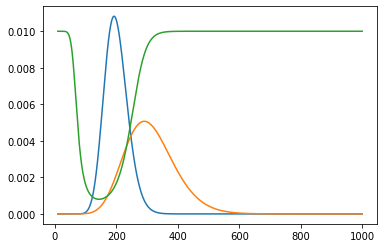

In [128]:
x = torch.arange(10, 1000, 0.1)
d = dist.Gamma(200 / 7, 1 / 7)
d2 = dist.Gamma((200+3*np.sqrt(200*7)) / 21, 1 / 21)
#d3 = dist.Gamma(x / 7, 1 / 7)
plt.plot(x, d.log_prob(x).exp(), "-", label="1.4")
plt.plot(x, d2.log_prob(x).exp(), "-", label="2.25")
plt.plot(x, d2.log_prob(x).exp() / (d.log_prob(x).exp() + d2.log_prob(x).exp())*0.01, "-", label="0.75")
plt.show()

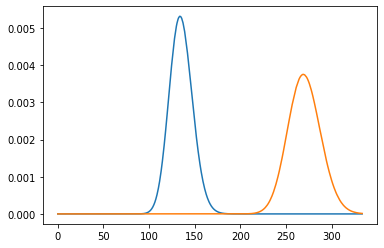

In [136]:
x = torch.arange(0, 2000, 0.1)
d = dist.Gamma((np.sqrt(150*7))/ (7*0.04), 1 / 7)
d2 = dist.Gamma((2*np.sqrt(150*7))/ (7*0.04), 1 / 7)
#d3 = dist.Gamma(x / 7, 1 / 7)
plt.plot(x/6, d.log_prob(x).exp(), "-", label="1.4")
#plt.plot(x, d2.log_prob(x).exp(), "-", label="2.25")
plt.plot(x/6, d2.log_prob(x).exp(), "-", label="0.75")
plt.show()

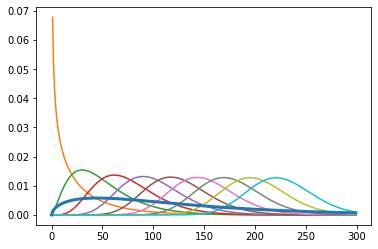

In [69]:
x = torch.arange(0, 300., 1)
for i in range(10):
    d = dist.Gamma(i**2*25*0.025, i*0.025)
    plt.plot(x, d.log_prob(x).exp(), "-", label="2.25")
d = dist.Gamma(25*25*0.0025, 0.0025*5)
plt.plot(x, d.log_prob(x).exp(), "-", lw=3, label="2.25")
plt.show()

In [71]:
25*0.0025

0.0625

In [8]:
# load cosmos results
#name = "FL_1118_2225_0p3OD"
name = "FL_2226_3338_0p6OD"
#name = "FL_1_1117_0OD"

path_data = "/shared/centaur/data/experimental/nonattenuated/{}".format(name)
path_params = os.path.join(path_data, "runs/spotdetection/v1.1.5/S1/nocontrol/lr0.005/bs5")
pyro.get_param_store().clear()
pyro.get_param_store().load(os.path.join(path_params, "params"))

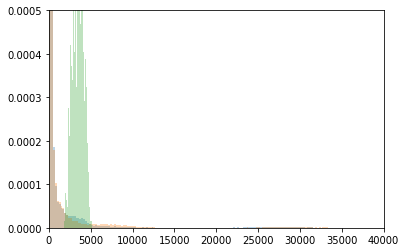

In [57]:
plt.hist(pyro.param("d/h_loc").data.flatten().cpu().numpy(), bins=200, density=True, alpha=0.3)
plt.hist((pyro.param("d/b_loc").mean()*pyro.param("d/h_loc") / pyro.param("d/b_loc").unsqueeze(-1)).data.flatten().cpu().numpy(),
         bins=200, density=True, alpha=0.3)
mask = pyro.param("d/b_loc") < 105
plt.hist(pyro.param("d/h_loc")[mask].data.flatten().cpu().numpy(), bins=200, density=True, alpha=0.3)
plt.ylim(0, 0.0005)
plt.xlim(0, 40000)
plt.show()

In [122]:
# load cosmos results

path_data = "/shared/centaur/data/test/GraceArticlePol2/"
path_params = os.path.join(path_data, "runs/empirical/v1.1.5/S1/nocontrol/lr0.005/bs8")
model = Empirical(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

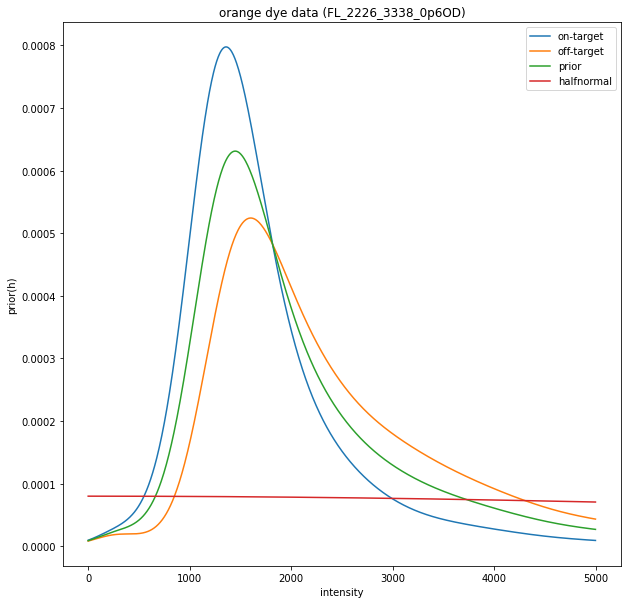

In [123]:
plt.figure(figsize=(10,10))
x = torch.arange(0, 5000., 5)
d0 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.z_probs[..., 1].flatten() / model.z_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d0.log_prob(x).exp().data, "-", label="on-target")
d1 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.j_probs[..., 1].flatten() / model.j_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d1.log_prob(x).exp().data, "-", label="off-target")
d2 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.m_probs[..., 1].flatten() / model.m_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d2.log_prob(x).exp().data, "-", label="prior")
d3 = dist.HalfNormal(10000.)
plt.plot(x, d3.log_prob(x).exp().data, "-", label="halfnormal")
plt.title("orange dye data (FL_2226_3338_0p6OD)")
plt.ylabel("prior(h)")
plt.xlabel("intensity")
plt.legend()
plt.show()

In [50]:
#name = "FL_2226_3338_0p6OD"
#name = "FL_1_1117_0OD"
name = "FL_4445_5554_1p1OD"

path_data = "/shared/centaur/data/test/GraceArticlePol2/"
path_params = os.path.join(path_data, "runs/spotdetection/v1.1.5/S1/nocontrol/lr0.005/bs8")
model = SpotDetection(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

In [76]:
#name = "FL_2226_3338_0p6OD"
name = "FL_1_1117_0OD"
#name = "FL_3339_4444_0p8OD"

path_data = "/shared/centaur/data/experimental/nonattenuated/{}".format(name)
path_params = os.path.join(path_data, "runs/norm/v1.1.5/S1/nocontrol/lr0.005/bs5")
model = SpotDetection(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

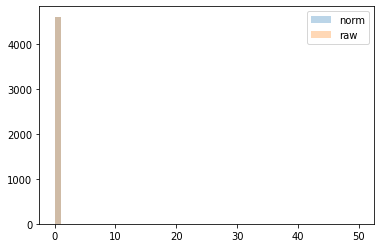

In [73]:
# spotdetection
mask = model.m_probs[..., 1] > 0.5
h_norm = pyro.param("d/h_loc") / pyro.param("d/b_loc").unsqueeze(-1)
plt.hist(h_norm[mask].data.numpy(), range=(0,50), bins=50, alpha=0.3, label="norm")

h_norm = pyro.param("d/h_loc") / 250
plt.hist(h_norm[mask].data.numpy(), range=(0,50), bins=50, alpha=0.3, label="raw")
plt.legend()
plt.show()

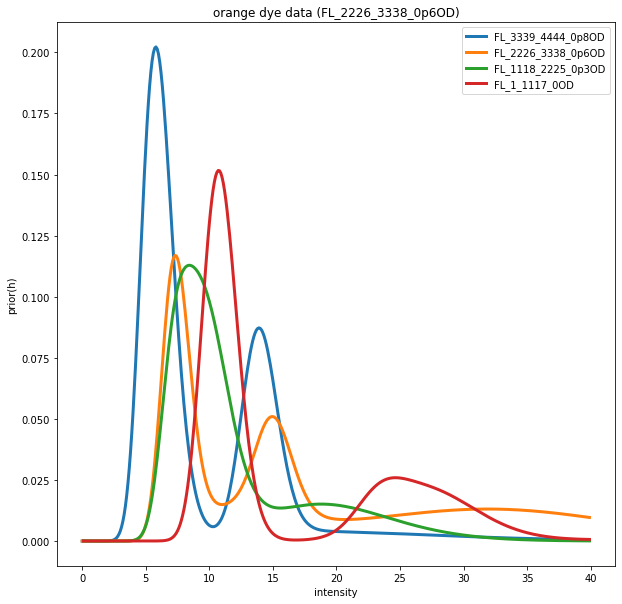

In [90]:
#names = ["FL_5555_6684_1p3OD", "FL_4445_5554_1p1OD", "FL_3339_4444_0p8OD",
#         "FL_2226_3338_0p6OD", "FL_1118_2225_0p3OD", "FL_1_1117_0OD"]
names = ["FL_3339_4444_0p8OD", "FL_2226_3338_0p6OD", "FL_1118_2225_0p3OD", "FL_1_1117_0OD"]
plt.figure(figsize=(10,10))

for name in names:
    path_data = "/shared/centaur/data/experimental/nonattenuated/{}".format(name)
    path_params = os.path.join(path_data, "runs/norm/v1.1.5/S1/nocontrol/lr0.005/bs5")
    model = SpotDetection(S=1, K=2)
    model.load(path_data, False, "cpu")
    model.load_parameters(path_params)


    x = torch.arange(0, 40., 0.1)
    d0 = MultiModal(
        pyro.param("height_loc").data,
        pyro.param("height_beta").data,
        pyro.param("height_pi").data.log())
    plt.plot(x, d0.log_prob(x).exp().data, "-", lw=3, label=name)

plt.title("orange dye data (FL_2226_3338_0p6OD)")
plt.ylabel("prior(h)")
plt.xlabel("intensity")
plt.legend()
plt.show()

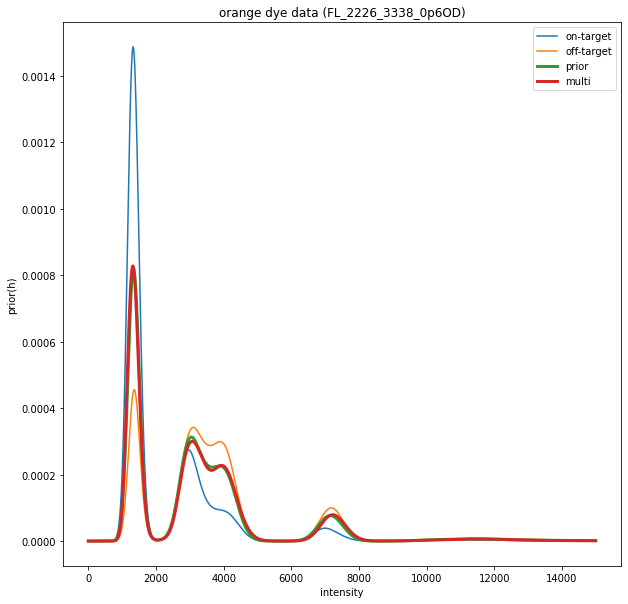

In [22]:
plt.figure(figsize=(10,10))
x = torch.arange(0, 15000., 3)
d0 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.z_probs[..., 1].flatten() / model.z_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d0.log_prob(x).exp().data, "-", label="on-target")
d1 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.j_probs[..., 1].flatten() / model.j_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d1.log_prob(x).exp().data, "-", label="off-target")
d2 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.m_probs[..., 1].flatten() / model.m_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d2.log_prob(x).exp().data, "-", lw=3, label="prior")
d0 = MultiModal(
    pyro.param("height_loc").data,
    pyro.param("height_beta").data,
    pyro.param("height_pi").data.log())
plt.plot(x, d0.log_prob(x).exp().data, "-", lw=3, label="multi")
plt.title("orange dye data (FL_2226_3338_0p6OD)")
plt.ylabel("prior(h)")

plt.xlabel("intensity")
plt.legend()
plt.show()

In [2]:
name = "FL_2226_3338_0p6OD"
#name = "FL_1_1117_0OD"

path_data = "/shared/centaur/data/experimental/nonattenuated/{}".format(name)
path_params = os.path.join(path_data, "runs/nomask/v1.1.5/S1/nocontrol/lr0.005/bs5")
model = Empirical(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

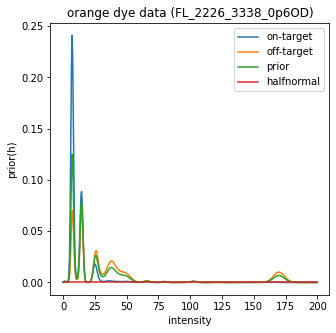

In [167]:
plt.figure(figsize=(5,5))
x = torch.arange(0, 200., 0.5)
d0 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.z_probs[..., 1].flatten() / model.z_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d0.log_prob(x).exp().data, "-", label="on-target")
d1 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.j_probs[..., 1].flatten() / model.j_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d1.log_prob(x).exp().data, "-", label="off-target")
d2 = NormalKDE(
    pyro.param("d/h_loc").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.m_probs[..., 1].flatten() / model.m_probs[..., 1].sum()).log(), "CPU")
plt.plot(x, d2.log_prob(x).exp().data, "-", label="prior")
d3 = dist.HalfNormal(10000.)
plt.plot(x, d3.log_prob(x).exp().data, "-", label="halfnormal")
plt.title("orange dye data (FL_2226_3338_0p6OD)")
plt.ylabel("prior(h)")
plt.xlabel("intensity")
plt.legend()
plt.show()

In [49]:
# load cosmos results
# name = "FL_1_1117_0OD"
#path_data = "/shared/centaur/data/simulations/lamda_data/h3000pi15lamda50/"
path_data = "/shared/centaur/data/height_data/h3000pi15lamda15/"
path_params = os.path.join(path_data, "runs/spotdetection2/v1.1.5/S1/nocontrol/lr0.005/bs5")
model = Empirical(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

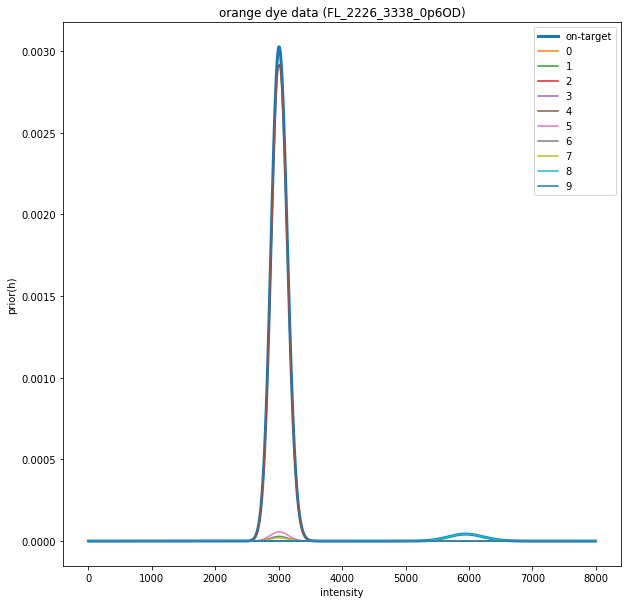

In [50]:
plt.figure(figsize=(10,10))
x = torch.arange(0, 8000., 5)
d0 = MultiModal(
    pyro.param("height_loc").data,
    pyro.param("height_beta").data,
    pyro.param("height_pi").data.log())
plt.plot(x, d0.log_prob(x).exp().data, "-", lw=3, label="on-target")
for i in range(10):
    d = dist.Gamma(
        pyro.param("height_loc")[i] * pyro.param("height_beta")[i],
        pyro.param("height_beta")[i])
    plt.plot(x, d.log_prob(x).exp().data * pyro.param("height_pi")[i].data, "-", label=i)
plt.title("orange dye data (FL_2226_3338_0p6OD)")
plt.ylabel("prior(h)")
plt.xlabel("intensity")
plt.legend()
plt.show()

In [18]:
d = dist.Gamma(
    pyro.param("d/h_loc").flatten().data * pyro.param("d/h_beta").flatten().data,
    pyro.param("d/h_beta").flatten().data)

x = 

obs_logits = d.log_prob(x)
result = obs_logits + (model.m_probs[..., 1].flatten() / model.m_probs[..., 1].sum()).log()
result = torch.logsumexp(result, -1)
result.shape

torch.Size([3, 4])

In [25]:
M = 3000
N = 5000

dtype = 'float32' # Could be 'float32' or 'float64'
torchtype = torch.float32 if dtype == 'float32' else torch.float64

x = torch.rand(M, 1, dtype=torchtype)
y = torch.rand(N, 1, dtype=torchtype, requires_grad=True)
a = torch.rand(N, 1, dtype=torchtype)
p = torch.rand(1, dtype=torchtype)

In [28]:
from pykeops.torch import Genred

formula = 'Square(p-a)*Exp(x+y)'
variables = ['x = Vi(1)',  # First arg   : i-variable, of size 1 (scalar)
             'y = Vj(1)',  # Second arg  : j-variable, of size 1 (scalar)
             'a = Vj(1)',  # Third arg   : j-variable, of size 1 (scalar)
             'p = Pm(1)']  # Fourth  arg : Parameter,  of size 1 (scalar)

my_routine = Genred(formula, variables, reduction_op='LogSumExp', axis=1, dtype=dtype)
c = my_routine(x, y, a, p, backend='CPU')

Compiling libKeOpstorch39fa329a34 in /home/ordabayev/.cache/pykeops-1.4.1-cpython-37/build-libKeOpstorch39fa329a34:
       formula: Max_SumShiftExp_Reduction(Square(p-a)*Exp(x+y),0)
       aliases: x = Vi(0,1); y = Vj(1,1); a = Vj(2,1); p = Pm(3,1); 
       dtype  : float32
... Done.


In [32]:
import time

if torch.cuda.is_available():
    # first transfer data on gpu
    pc, ac, xc, yc = p.cuda(), a.cuda(), x.cuda(), y.cuda()
    # then call the operations
    start = time.time()
    c3 = my_routine(xc, yc, ac, pc, backend='GPU')

In [43]:
var = (self.scale ** 2)
        log_scale = math.log(self.scale) if isinstance(self.scale, Number) else self.scale.log()
    
-((value - self.loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [48]:
from pykeops.torch import Genred
import math
dtype = 'float32'

x = torch.arange(0, 2000, 1.).reshape(-1,1).cuda()
m = (model.m_probs[..., 1] / model.m_probs[..., 1].sum()).log().reshape(-1,1).cuda()
loc = pyro.param("d/h_loc").data.reshape(-1,1).cuda()
var = (pyro.param("d/h_loc").data / pyro.param("d/h_beta").data).reshape(-1,1).cuda()
p = torch.tensor([math.log(math.sqrt(2 * math.pi))]).cuda()
#p = math.log(math.sqrt(2 * math.pi))

formula = 'm-Square(x-loc)/(IntCst(2)*var)-Log(Sqrt(var))-p'
variables = ['x = Vi(1)',  # First arg   : i-variable, of size 1 (scalar)
             'm = Vj(1)',  # Second arg  : j-variable, of size 1 (scalar)
             'loc = Vj(1)',  # Second arg  : j-variable, of size 1 (scalar)
             'var = Vj(1)',
             'p = Pm(1)']  # Fourth  arg : Parameter,  of size 1 (scalar)

my_routine = Genred(formula, variables, reduction_op='LogSumExp', axis=1, dtype=dtype)
c = my_routine(x, m, loc, var, p, backend='GPU')
c.shape

torch.Size([2000, 1])

In [53]:
torch.Size([])

torch.Size([])

In [52]:
shape = c.shape
c.reshape(-1).reshape(shape).shape

torch.Size([2000, 1])

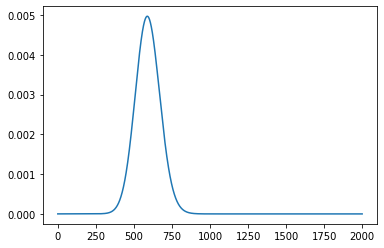

In [49]:
plt.plot(x.squeeze().cpu(), c.squeeze().exp().cpu(), "-", label="2.25")
plt.show()

In [37]:
dl = dist.Normal(loc, torch.sqrt(var)).log_prob(x.unsqueeze(-1))

In [40]:
torch.logsumexp(m+dl, -2)

tensor([[-14.0166],
        [-14.0124],
        [-14.0135],
        [-14.0157],
        [-14.0131],
        [-14.0143],
        [-14.0140],
        [-14.0133],
        [-14.0127],
        [-14.0148],
        [-14.0168],
        [-14.0161],
        [-14.0143],
        [-14.0167],
        [-14.0147],
        [-14.0117],
        [-14.0163],
        [-14.0159],
        [-14.0116],
        [-14.0133],
        [-14.0139],
        [-14.0169],
        [-14.0145],
        [-14.0123],
        [-14.0153],
        [-14.0169],
        [-14.0147],
        [-14.0151],
        [-14.0122],
        [-14.0164],
        [-14.0152],
        [-14.0139],
        [-14.0116],
        [-14.0154],
        [-14.0115],
        [-14.0160],
        [-14.0116],
        [-14.0127],
        [-14.0159],
        [-14.0133],
        [-14.0160],
        [-14.0154],
        [-14.0138],
        [-14.0159],
        [-14.0143],
        [-14.0121],
        [-14.0129],
        [-14.0144],
        [-14.0139],
        [-14.0140],


In [67]:
c

tensor([[9.5797],
        [9.4880],
        [9.2278],
        ...,
        [9.4733],
        [9.2224],
        [9.2204]], device='cuda:0')

In [5]:
# Create two arrays with 3 columns and a (huge) number of lines, on the GPU
import torch
x = torch.randn(1000000, 3, requires_grad=True).cuda()
y = torch.randn(2000000, 3).cuda()

# Turn our Tensors into KeOps symbolic variables:
from pykeops.torch import LazyTensor
x_i = LazyTensor( x[:,None,:] )  # x_i.shape = (1e6, 1, 3)
y_j = LazyTensor( y[None,:,:] )  # y_j.shape = ( 1, 2e6,3)

# We can now perform large-scale computations, without memory overflows:
D_ij = ((x_i - y_j)**2).sum(dim=2)  # Symbolic (1e6,2e6,1) matrix of squared distances
K_ij = (- D_ij).exp()               # Symbolic (1e6,2e6,1) Gaussian kernel matrix

# And come back to vanilla PyTorch Tensors or NumPy arrays using
# reduction operations such as .sum(), .logsumexp() or .argmin().
# Here, the kernel density estimation   a_i = sum_j exp(-|x_i-y_j|^2)
# is computed using a CUDA online map-reduce routine that has a linear
# memory footprint and outperforms standard PyTorch implementations
# by two orders of magnitude.
a_i = K_ij.sum(dim=1)  # Genuine torch.cuda.FloatTensor, a_i.shape = (1e6, 1),
#g_x = torch.autograd.grad((a_i ** 2).sum(), [x])  # KeOps supports autograd!

Compiling libKeOpstorch1b684f012a in /home/ordabayev/.cache/pykeops-1.4.1-cpython-37/build-libKeOpstorch1b684f012a:
       formula: Sum_Reduction(Exp(Minus(Sum(Square((Var(0,3,0) - Var(1,3,1)))))),0)
       aliases: Var(0,3,0); Var(1,3,1); 
       dtype  : float32
... Done.


In [15]:
(a_i ** 2).sum().backward()

In [17]:
D_ij

In [16]:
x.grad

/home/ordabayev/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [3]:
import pykeops
pykeops.clean_pykeops()          # just in case old build files are still present
pykeops.test_torch_bindings()    # perform the compilation

/home/ordabayev/.cache/pykeops-1.4.1-cpython-37/libKeOpstorch45062eb96e.cpython-37m-x86_64-linux-gnu.so has been removed.
/home/ordabayev/.cache/pykeops-1.4.1-cpython-37/libKeOpstorch1b684f012a.cpython-37m-x86_64-linux-gnu.so has been removed.
/home/ordabayev/.cache/pykeops-1.4.1-cpython-37/libKeOpstorch45062eb96e.so has been removed.
/home/ordabayev/.cache/pykeops-1.4.1-cpython-37/libKeOpstorch1b684f012a.so has been removed.
Compiling libKeOpstorch01eb396f50 in /home/ordabayev/.cache/pykeops-1.4.1-cpython-37/build-libKeOpstorch01eb396f50:
       formula: Sum_Reduction(SqNorm2(x - y),1)
       aliases: x = Vi(0,3); y = Vj(1,3); 
       dtype  : float32
... Done.

pyKeOps with torch bindings is working!



In [187]:
-0.5 + torch.logsumexp(x+0.5, 0)

tensor(-0.0758)

In [ ]:
for i in range(len(x)):
    result = 

In [205]:
torch.logsumexp(x[:2], 0)

tensor(-1.6867)

In [206]:
torch.logsumexp(x[2:], 0)

tensor(-0.2986)

In [207]:
torch.logsumexp(torch.tensor([-1.6867, -0.2986]), 0)

tensor(-0.0758)

In [281]:
x = torch.rand(3, 4, 21)

In [282]:
torch.logsumexp(x, -1)

tensor([[3.6708, 3.7168, 3.6054, 3.5687],
        [3.4495, 3.6599, 3.4191, 3.5663],
        [3.6116, 3.5416, 3.4584, 3.5281]])

In [286]:
divmod(21, 3)

(7, 0)

In [285]:
result = x[..., :1]
for i in range(7):
    result = torch.logsumexp(torch.cat((result, x[..., 1+3*i:1+3*(i+1)]), -1), -1, keepdim=True)
result.squeeze(-1)

tensor([[3.6708, 3.7168, 3.6054, 3.5687],
        [3.4495, 3.6599, 3.4191, 3.5663],
        [3.6116, 3.5416, 3.4584, 3.5281]])

In [263]:
def logsumexp(value):
    k = value.shape[-1]
    print(k)
    if k > 5:
        lse1 = logsumexp(value[..., :5])
        lse2 = logsumexp(value[..., 5:])
        result = torch.logsumexp(torch.cat((lse1, lse2), -1), -1, keepdim=True)
    elif k == 1:
        result = value
    else:
        result = torch.logsumexp(value, -1, keepdim=True)
    print(result.shape)
    return result

In [264]:
logsumexp(x).squeeze()

21
5
torch.Size([3, 4, 1])
16
5
torch.Size([3, 4, 1])
11
5
torch.Size([3, 4, 1])
6
5
torch.Size([3, 4, 1])
1
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])


tensor([[3.6162, 3.5797, 3.5220, 3.6030],
        [3.6379, 3.6066, 3.6532, 3.6106],
        [3.5565, 3.5000, 3.6111, 3.5121]])

In [194]:
-0.5 - 1.5 + torch.logsumexp(x+0.5+1.5, 0)

tensor(-0.0758)

In [196]:
-0.5 - 1.5 + torch.logsumexp(x+0.5+1.5, 0)

tensor(-0.0758)

In [186]:
x[:-1]

tensor([-3., -2., -2.])

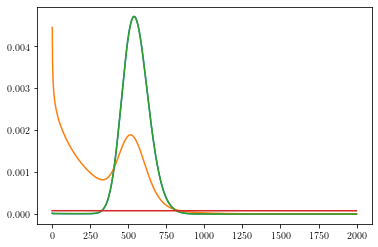

In [156]:
x = torch.arange(0, 2000., 1)
d0 = MultiModal(
    pyro.param("d/h_loc").flatten().data * pyro.param("d/h_beta").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.z_probs[..., 1].flatten() / model.z_probs[..., 1].sum()).log())
plt.plot(x, d0.log_prob(x).exp().data, "-", label="2.25")
d1 = MultiModal(
    pyro.param("d/h_loc").flatten().data * pyro.param("d/h_beta").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.j_probs[..., 1].flatten() / model.j_probs[..., 1].sum()).log())
plt.plot(x, d1.log_prob(x).exp().data, "-", label="2.25")
d2 = MultiModal(
    pyro.param("d/h_loc").flatten().data * pyro.param("d/h_beta").flatten().data,
    pyro.param("d/h_beta").flatten().data,
    (model.m_probs[..., 1].flatten() / model.m_probs[..., 1].sum()).log())
plt.plot(x, d2.log_prob(x).exp().data, "-", label="2.25")
d3 = dist.HalfNormal(10000.)
plt.plot(x, d3.log_prob(x).exp().data, "-", label="2.25")
plt.show()

In [74]:
pyro.param("height_concentration") / pyro.param("height_beta")

tensor([[  197.3169,  2463.0132, 16994.2617],
        [   77.1033,  1557.9419,  3418.8398]], grad_fn=<DivBackward0>)

In [75]:
pyro.param("height_pi")

tensor([[5.6921e-02, 5.9123e-01, 3.5185e-01],
        [2.0792e-04, 7.8784e-01, 2.1195e-01]], grad_fn=<DivBackward0>)

In [52]:
pyro.param("height_concentration")

tensor([ 0.9096,  1.3247, 21.1137], grad_fn=<AddBackward0>)

In [77]:
pyro.param("d/logits_state").max()

tensor(9.2687, grad_fn=<MaxBackward1>)